## Librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

## Problema 1

Considere las dos caracteristicas "Alcohol level" y "Alcalinity level" del conjunto de datos [wine_data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). 

In [ ]:
# load data
from sklearn.datasets import load_wine
import scipy.stats

alcohol_levels = load_wine()['data'][:, [0]].ravel()
alcalinity_levels = load_wine()['data'][:, [3]].ravel()

alcohol_levels.shape, alcalinity_levels.shape

((178,), (178,))

a) A partir de esas dos caracteristicas del vino, calcule el vector $\vec{\mu}$ y la matrix de covarianza $\Sigma$, 

$$
\vec{\mu} = \begin{bmatrix}
\mu_x\\
\mu_y
\end{bmatrix}, \quad \Sigma = \begin{bmatrix}
\text{Var}(x) & \text{Cov}(x, y)\\
\text{Cov}(y, x) & \text{Var}(y)
\end{bmatrix}
$$

In [ ]:
covar = np.zeros((2, 2))
mu = np.zeros(2)
mu[0] = np.mean(alcohol_levels)
mu[1] = np.mean(alcalinity_levels)
covar = np.cov(alcohol_levels,alcalinity_levels)
print(mu, covar)

[13.00061798 19.49494382] [[ 0.65906233 -0.8410929 ]
 [-0.8410929  11.15268616]]


b) Gráfique los puntos del problema, con alcohol levels en x, y alcalinity levels en y

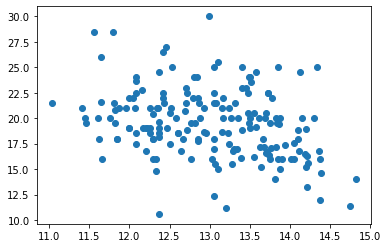

In [ ]:
# tu codigo aqui
plt.scatter(alcohol_levels,alcalinity_levels)

c) A partir del la matriz de covarianza se puede obtener una función de de densidad de probabilidad de los datos como una Gaussiana bivariada, cuya fórmula está dada por, 

$$
  f(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^k\text{det}(\Sigma)}}\exp\Big(-\frac{1}{2}(\mathbf{x}- \mathbf{\mu})^T\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})\Big)
$$

Donde $\mathbf{\mu}$, es el promedio, $\Sigma$ la matriz de covarianza, y $k$, el orden de la gausiana multivariada.

Use la siguiente implementación para gráficar la función de densidad de probabilidad bivariada. [Bivariate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html)

Tenga en cuenta los límites



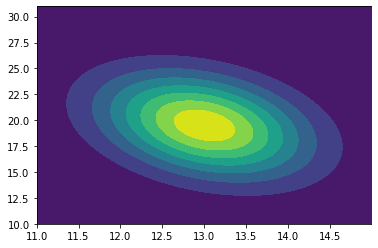

In [ ]:
# tu codigo aqui
x, y = np.mgrid[11:15:.01, 10:31:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(mu, covar)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

d) A partir de la función de densidad, La correlación de los datos es positiva, negativa o nula? Por qué?

Tu texto aquí,

Seria negativa puesto que en la matriz de covarianza sus entradas $\Sigma_{21}$ y $\Sigma_{12}$ son negativas y por tanto su relación es inversamente proporcional. Ademas, Cuando graficamos los datos nos quedan con pendiente negativa.

## Problema 2 (continuación)

e) Diagonalice la matriz de covarianza, es decir imprima los valores propios y vectores propios de la matriz de covarianza

In [ ]:
# Tu codigo aquí
Val_P, Vec_P = np.linalg.eig(covar)
print('Valores Propios: ')
for i in range(Val_P.size):
  print(i+1,') ',Val_P[i])
print('*'*100)
print('Vectores Propios: ')
print(Vec_P)

Valores Propios: 
1 )  0.5920740449345221
2 )  11.219674437894147
****************************************************************************************************
Vectores Propios: 
[[-0.9968434   0.07939293]
 [-0.07939293 -0.9968434 ]]


f) A partir de los vectores propios y valores propios de la matriz, y el vector $\vec{\mu}$.

*   Desplace los datos de forma que el promedio de los datos en juntas coordenadas sea cero.
*   Rote los datos de forma que la covarianza de los datos sea cero.

Una rotación de puntos en dos dimensiones se puede ver como una matriz de la forma,

$$
\text{Rot}(\theta) = \begin{bmatrix}
\cos{\theta} & -\sin{\theta}\\
\sin{\theta} & \cos{\theta}
\end{bmatrix}
$$

In [ ]:
# tu codigo aqui
M = np.array([alcohol_levels,alcalinity_levels])
MVM = np.array([[mu[0]],[mu[1]]])
MC = M - MVM

inv_p = np.linalg.inv(Vec_P)
MCR = inv_p@MC
Rot = inv_p @ covar @ Vec_P
print(Rot.shape)

(2, 2)


g) Gráfique la función de densidad de probabilidad de datos rotados  a partir de la diagonzalización de la matrix de covarianza original (parte f). 

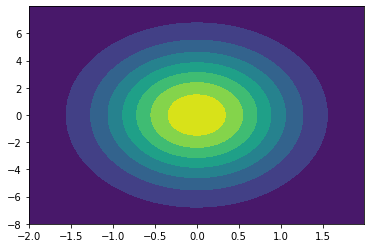

In [ ]:
# tu codigo aqui
x, y = np.mgrid[-2:2:.01, -8:8:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0,0], Rot)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

h) Las coordenadas de los nuevos datos se llaman Componentes principales, lo que hicimos fue basicamente el método PCA. Argumente cómo se puede usar PCA para reducir la dimensionalidad de los datos.


Tu texto aquí,

De esta manera podemos visualizar los datos con mayor varianza y por tanto los que tienen mayor posibilidad de ser errores o contener la menor cantidad de información. Con esta información, podemos depurar los datos para quedarnos con los mas interesantes y los que mas información traen.